In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# STEP 2: IMPORT LIBRARIES
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# STEP 3: SET DATASET PATH (CHANGE THIS TO YOUR UNZIPPED FOLDER INSIDE DRIVE)
dataset_path = '/content/Colab Notebooks/fer2013'


In [4]:
# STEP 4: DATA PREPROCESSING
img_height, img_width = 48, 48
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',  # change to 'rgb' if your images are colored
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = train_generator.num_classes


Found 3171 images belonging to 2 classes.
Found 792 images belonging to 2 classes.


In [5]:
# STEP 5: BUILD CNN MODEL
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')  # Output based on number of emotion categories
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,402 (3.20 MB)

 Trainable params: 838,402 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# STEP 6: TRAIN THE MODEL
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1267s 13s/step - accuracy: 0.9743 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 5.3361e-06
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 1.0000 - loss: 1.6615e-07 - val_accuracy: 1.0000 - val_loss: 4.7444e-06
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 1.0000 - loss: 3.9433e-09 - val_accuracy: 1.0000 - val_loss: 4.5923e-06
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 1.0000 - loss: 1.5292e-07 - val_accuracy: 1.0000 - val_loss: 3.2092e-06
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 1.0000 - loss: 9.8884e-08 - val_accuracy: 1.0000 - val_loss: 1.4449e-06
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 1.0000 - loss: 1.3597e-07 - val_accuracy: 1.0000 - val_loss: 8.6187e-07
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 1.0000 - loss: 2.8960e-08 - val_accuracy: 1.0000 - val_loss: 7.5747e-07
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━

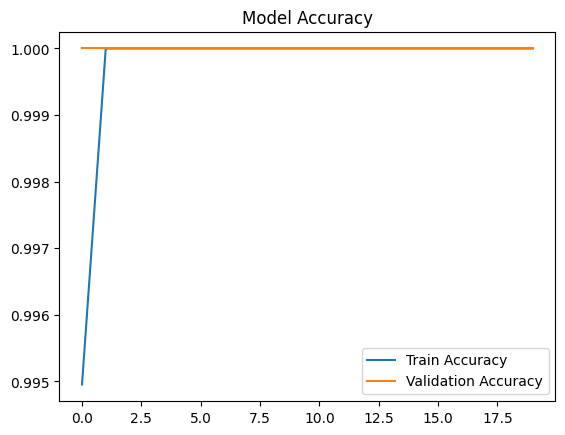

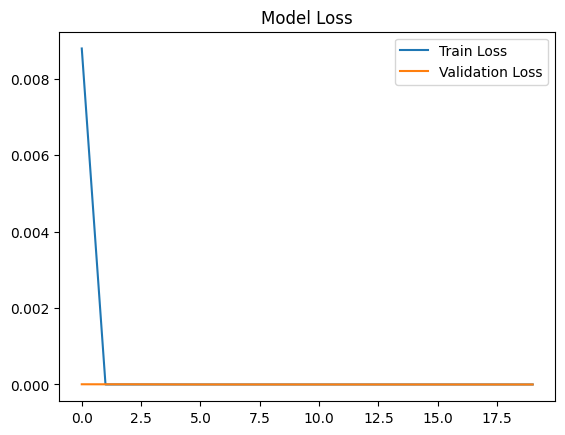

In [7]:
# STEP 7: PLOT ACCURACY AND LOSS
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def predict_emotion(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array_expanded)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Convert original image to displayable format (grayscale to RGB)
    img_display = cv2.imread(img_path)
    img_display = cv2.resize(img_display, (300, 300))  # Resize for better display
    cv2.putText(
        img_display,
        f"{predicted_class} ({confidence:.2f}%)",
        (10, 25),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2
    )

    # Convert BGR to RGB for matplotlib
    img_display_rgb = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)

    # Show image with predicted label on top
    plt.imshow(img_display_rgb)
    plt.axis('off')
    plt.title("Predicted Emotion")
    plt.show()

    # Also print textual output below image
    print(f"🧠 Predicted Emotion: {predicted_class} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


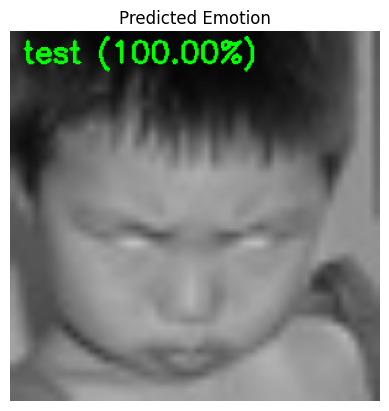

🧠 Predicted Emotion: test (100.00% confidence)


In [17]:
predict_emotion("/content/drive/MyDrive/Colab Notebooks/fer2013/train/angry/Training_10118481.jpg")